In [33]:
import numpy as np
import numpy.linalg as la # pro vypocet normy
import scipy.optimize as optimize # pro vypocet minima kriterialni funkce

class naivni_logisticka_regrese_binarni:
  def __init__(self):
    self._w = None
    self._X = None
    self._y = None
    self._regularization=False
    self._c=0.01

  def sigmoida(self, w, X):
    """
    Pomocna metoda pro vypocet sigmoidy
    """
    return 1.0/(1.0+np.exp(-X @ w))


  def kriterialni_funkce_bez_regularizace(self, w):
    """
    Minimalizovana funkce
    """
    #return la.norm(self._y-self.sigmoida(w, self._X))
    return -(self._y.T @ np.log(self.sigmoida(w, self._X)+1e-10) + (1-self._y).T @ np.log(1-self.sigmoida(w, self._X)+1e-10)) # TODO regulariyace

  def kriterialni_funkce_s_regularizaci(self, w):
    """
    Minimalizovana funkce:
    """
    return self.kriterialni_funkce_bez_regularizace(w)+self._c*np.sum(w**2)

  def fit(self, X,y, c = 0.001, regularization=False):
    """
    Nauceni modelu. Pro uceni je vyuzita knihovna scipy a nastroje pro
    optimalizaci v ni obsazene.
    """
    self._regularization=regularization
    self._c=c
    dimenze = X.shape[1]+1
    radky = X.shape[0]
    # priprav si data - pridani sloupce se jednickami, pro bias
    self._X = np.hstack((np.ones((radky,1)), X)) # pridej jednicky
    self._y = y
    # je pouzita iteracni metoda optimalizace, nahodne je zvolena nulta iterace
    w0 = np.random.randn(dimenze) # nahodny bod
    self._w=w0
    print(f"Pocatecni hodnota krit. fce {self.kriterialni_funkce_bez_regularizace(w0)}")
    #print(f"Pocatecni hodnota vah w={w0}")
    if self._regularization:
      res = optimize.minimize(self.kriterialni_funkce_s_regularizaci, w0, method='BFGS', tol=1e-8)
    else:
      res = optimize.minimize(self.kriterialni_funkce_bez_regularizace, w0, method='BFGS', tol=1e-8)
    #res = optimize.minimize(self.kriterialni_funkce, w0, method='BFGS', tol=1e-5)
    self._w = res.x
    print(f"Konecna hodnota krit. fce {self.kriterialni_funkce_bez_regularizace(self._w)}")
    #print(f"Konecna hodnota vah w={self._w}")
    return self._w

  def predict_proba(self, X):
    """
    Vypocet pravdepodobnosti prislusnosti ke tride
    """
    return self.sigmoida(self._w, np.hstack((np.ones((X.shape[0],1)), X)))

  def predict(self, X, hranice=0.5):
    """
    Predikce konkretni tridy na zaklade pravdepodobnosti.
    """
    pravdepodobnost = self.predict_proba( X)
    return  1* (pravdepodobnost > hranice)


In [ ]:
class ovr_classifier:
  def __init__(self):
    self._models=[]
    self._classes=[]

  def fit(self, X, y, c=0.01, regularization=True):
    self._classes=np.unique(y)
    for cls in self._classes:
      classifier = naivni_logisticka_regrese_binarni()
      ycls=1*(y==cls)
      classifier.fit(X,ycls,c=c,regularization=regularization)
      self._models.append(classifier)

  def predict(self, X):
    predictions=np.array([ model.predict_proba(X) for model in self._models])
    return self._classes[np.argmax(predictions, axis=0)]

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
n_samples = len(digits.images)
print(f"Pocet vzorku {n_samples}")
data = digits.images.reshape((n_samples, -1))/255 # reshape a normalizuj
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=False)

Pocet vzorku 1797


In [36]:
ovr = ovr_classifier()
ovr.fit(X_train, y_train, c=0.01, regularization=True)
y_pred = ovr.predict(X_test)

Pocatecni hodnota krit. fce 497.4744440275854
Konecna hodnota krit. fce 42.73406279859293
Pocatecni hodnota krit. fce 663.1228177548011
Konecna hodnota krit. fce 109.32189645192022
Pocatecni hodnota krit. fce 1993.2137801090748
Konecna hodnota krit. fce 72.91606311830785
Pocatecni hodnota krit. fce 1008.0660979317767
Konecna hodnota krit. fce 88.18138548324711
Pocatecni hodnota krit. fce 963.65669305202
Konecna hodnota krit. fce 54.290739285039336
Pocatecni hodnota krit. fce 549.7598198770563
Konecna hodnota krit. fce 77.2172847562239
Pocatecni hodnota krit. fce 583.0478048640689
Konecna hodnota krit. fce 56.43763428024769
Pocatecni hodnota krit. fce 2223.245170816135
Konecna hodnota krit. fce 64.22284904157752
Pocatecni hodnota krit. fce 1177.1352973261623
Konecna hodnota krit. fce 162.25858691572358
Pocatecni hodnota krit. fce 1270.1690769446793
Konecna hodnota krit. fce 115.04121040056219


In [38]:
print(f"LOG-REG:{metrics.classification_report(y_test, y_pred)}\n")

LOG-REG:              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.78      0.69      0.74        36
           2       1.00      1.00      1.00        35
           3       0.92      0.65      0.76        37
           4       0.97      0.92      0.94        37
           5       0.84      1.00      0.91        37
           6       1.00      0.95      0.97        37
           7       0.90      0.97      0.93        36
           8       0.68      0.76      0.71        33
           9       0.74      0.84      0.78        37

    accuracy                           0.88       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.88      0.87       360




Text(0.5, 0.98, 'Confusion Matrix LOG REG')

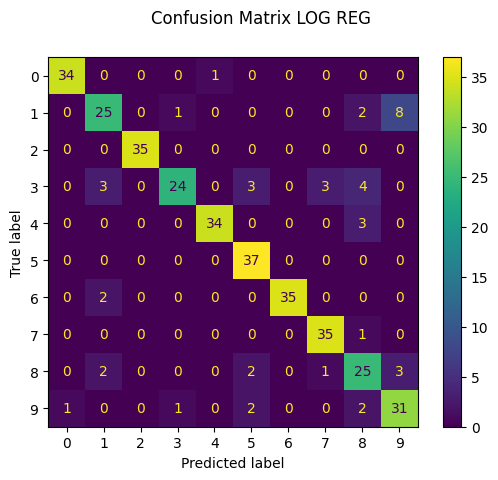

In [ ]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix LOG REG")
#disp.plot()

# 8 s 9 se pletou
# 8 s 5 se pletou

In [39]:
def knn_klasifikuj(X,y,x, k=3):
  """
  :param X: vstupni matice prvku, kazdy radek je jeden zaznam - trenovaci data
  :param y: labely trenovacich dat
  :param x: prvek ktery chceme klasifikovat
  :param k: počet sousedů
  :return: cislo tridy
  """
  def vzdalenost(x,y):
    return np.sum((x-y)**2)

   # urceni tabulky vzdalenosti - ulozime vzdalenost od x a label pro kazdy prvek z X
  tabulka = np.array([(vzdalenost(x,radek), label) for radek, label in zip(X[:],y)])
  # nalezeni k-nejblizsich prvku. Podobny algoritmus jako pro selection sort.
  for krok in range(k):
    index = np.argmin(tabulka[krok:,0], axis=0)+krok
    tabulka[[krok, index]]  =  tabulka[[index, krok]]
  # urceni cetnosti labelu pro k nejblizsich sousedu - prvnich k v tabulce
  cetnosti = {}
  for label in tabulka[:k,1]:  # jed jen pres sloupecek labelu
    if label in cetnosti:
      cetnosti[label] += 1
    else:
      cetnosti[label] = 1
  # vrat klic prislusejici nejcetnejsi hodnote
  return int(sorted(cetnosti.items(), key = lambda kv: kv[1])[-1][0])

y_pred_knn = [knn_klasifikuj(X_train,y_train,prvek) for prvek in X_test]
print(f"KNN:{metrics.classification_report(y_test, y_pred_knn)}\n")

KNN:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       0.97      0.86      0.91        37
           4       1.00      0.92      0.96        37
           5       0.90      1.00      0.95        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.91      0.94      0.93        33
           9       0.94      0.92      0.93        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360




Text(0.5, 0.98, 'Confusion Matrix KNN')

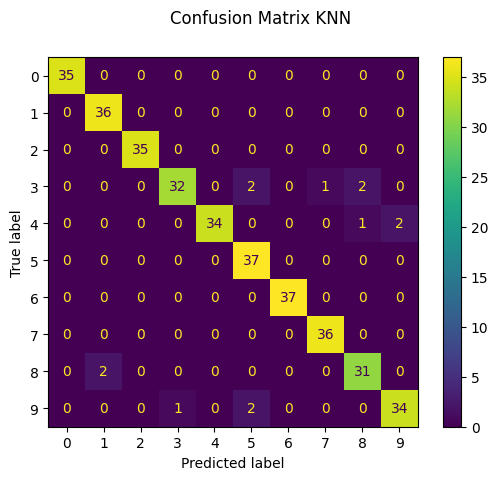

In [44]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
disp.figure_.suptitle("Confusion Matrix KNN")

In [6]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

seed = 42

data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), Normalizer()],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear']
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Nejlepší parametry:", grid_search.best_params_)
print("Nejlepší křížové skóre:", grid_search.best_score_)

Nejlepší parametry: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'scaler': StandardScaler()}
Nejlepší křížové skóre: 0.9859605911330049
